In [1]:
from glob import glob

import cv2
from pdf2image import convert_from_path
from PIL import Image
from scoring import *
from border_and_title import *

# f = "../../data/original/Ugly/10.pdf"
f = "../../data/original/Good/300-014834.pdf"

1235 1485 1200 1350
1103 1485 1200 1350
33


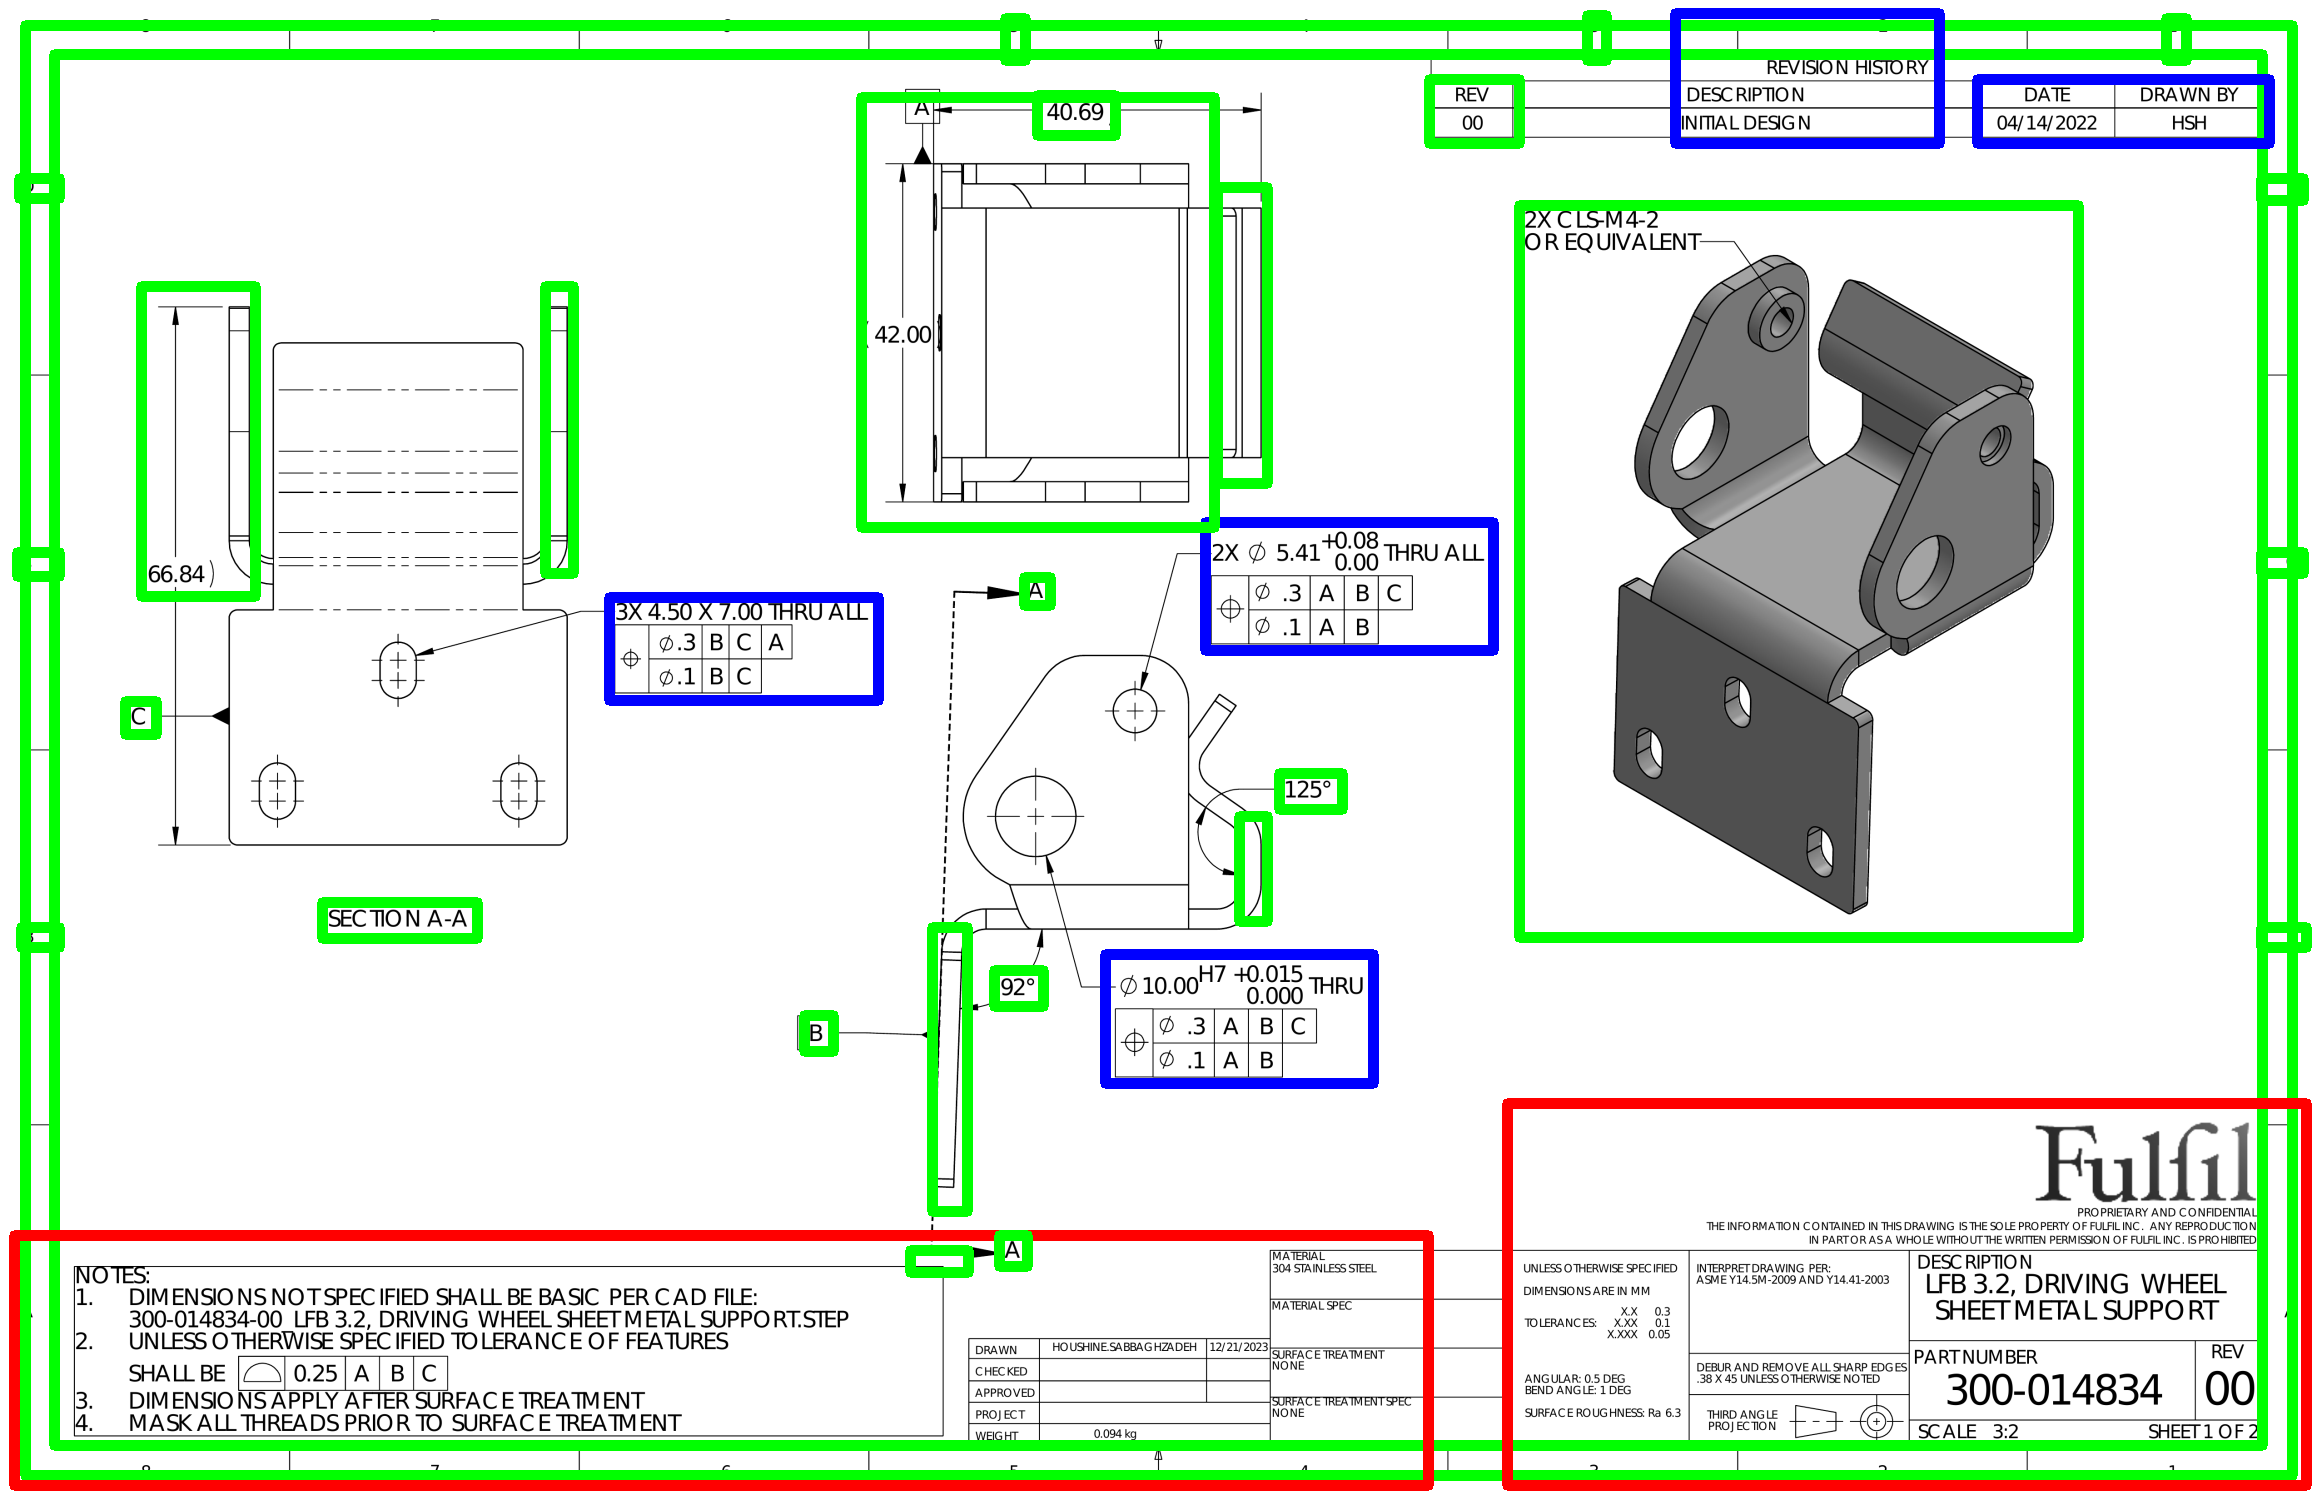

In [2]:
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
color = (255, 0, 0)
thickness = 2

pages = convert_from_path(f, dpi=300)
img = np.array(pages[0])
img = im_resize(img)
img_comp = img.copy()
im_h, im_w, _ = img.shape

sorted_indices, contours, hierarchy_area = detect_objects(img)
border_1, border_2 = detect_borders(contours, sorted_indices)
x, y, w, h = border_2
cv2.rectangle(img_comp, (x, y), (x+w, y+h), (0, 255, 0), 10)
x_1, y_1, w_1, h_1 = border_1
cv2.rectangle(img_comp, (x_1, y_1), (x_1+w_1, y_1+h_1), (0, 255, 0), 10)

title_contours = detect_probable_title_sections(img)

for cnt in title_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = w / float(h)
    area = w * h
    if area > 7000 and 2 < aspect_ratio < 10 and y > int((im_h * 70) / 100) and y+h > int((im_h * 93) / 100):
        print(y, y+h, int((im_h * 80) / 100), int((im_h * 90) / 100))
        cv2.rectangle(img_comp, (x, y), (x + w, y + h), (255, 0, 0), 10)
    elif area > 7000 and 1.3 < aspect_ratio < 10:
        cv2.rectangle(img_comp, (x, y), (x + w, y + h), (0, 0, 255), 10)
    else:
        cv2.rectangle(img_comp, (x, y), (x + w, y + h), (0, 255, 0), 10)

print(len(title_contours))
Image.fromarray(img_comp)